### Stewart Merritt
#### 12/6/2024
#### Purpose: Analayze the data collected from last seasons NBA season to find valuable information
#### Source of data: https://www.kaggle.com/datasets/orkunaktas/nba-players-stats-2324

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 2024 dataset
data = pd.read_csv(r"C:\Users\stewa\Downloads\Cleaned NBA.csv")

Convert relevant columns to numeric for proper analysis (From ChatGPT)

In [39]:
data['PTS'] = pd.to_numeric(data['PTS'], errors='coerce')
data['FTA'] = pd.to_numeric(data['FTA'], errors='coerce')

What 5 players scored the most points?

In [40]:
top_5_scorers = data[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)
print("Top 5 highest-scoring players:")
print(top_5_scorers)

Top 5 highest-scoring players:
                      Player   PTS
187              Joel Embiid  34.7
172              Luka Dončić  33.9
14     Giannis Antetokounmpo  30.4
236  Shai Gilgeous-Alexander  30.1
110            Jalen Brunson  28.7


###### Joel Embiid averaged the most points per game by .8 points, second was Luka however the difference in ppg increase a decent amount from 2 to 3 dropping by 3.5 where Giannis is who is then closely followed by Shai who is then followed by Jalen.

What teams had the most freethrow attempts per game?(not including players who played for 2 different teams)

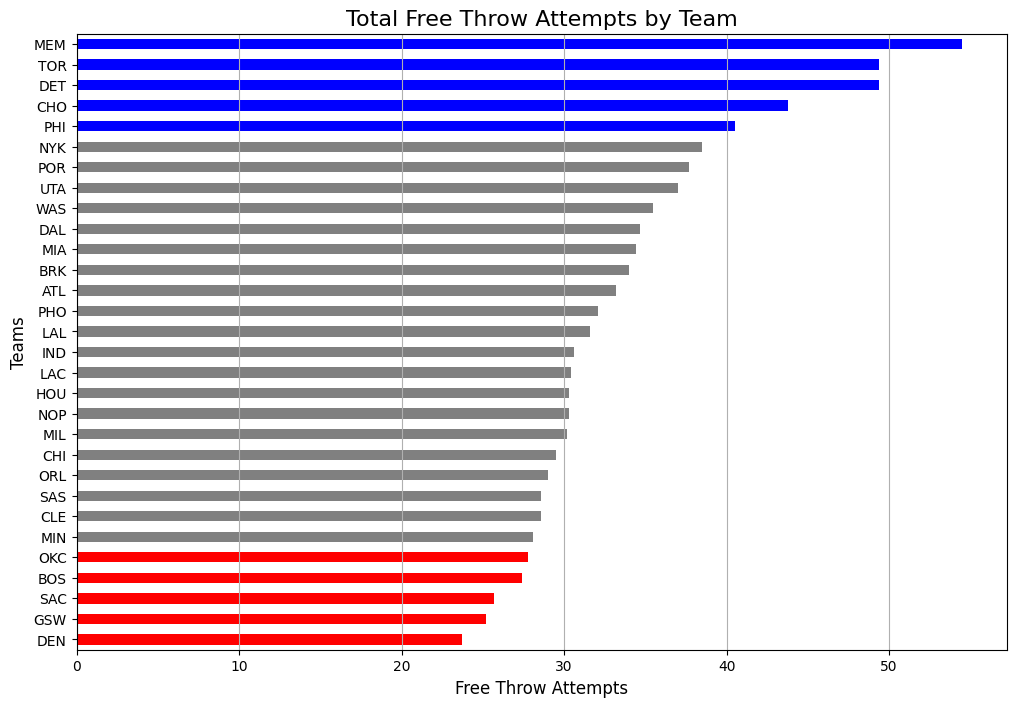

In [41]:
filtered_data = data[(data['Tm'] != 'Tm') & (data['Tm'] != 'TOT')]
free_throw_attempts_filtered = filtered_data.groupby('Tm')['FTA'].sum().sort_values()
sorted_teams = free_throw_attempts_filtered.sort_values()

# Assign colors: top 5 are blue, bottom 5 are red, rest are grey
colors = ['red' if i < 5 else 'blue' if i >= len(sorted_teams) - 5 else 'grey'
          for i in range(len(sorted_teams))]

plt.figure(figsize=(12, 8))
sorted_teams.plot(kind='barh', color=colors)
plt.title('Total Free Throw Attempts by Team', fontsize=16)
plt.xlabel('Free Throw Attempts', fontsize=12)
plt.ylabel('Teams', fontsize=12)
plt.grid(axis='x')
plt.show()

Memphis led the league in free throws by a commanding amount while denver attempted the least free throws with roughly a 30 attempts per game difference. 

Who were the top 5 leaders in steals plus blocks?

In [ ]:
data['STL'] = pd.to_numeric(data['STL'], errors='coerce')#formatting from ChatGPT
data['BLK'] = pd.to_numeric(data['BLK'], errors='coerce')#formatting from ChatGPT

data['STL+BLK'] = data['STL'] + data['BLK']

top_5_steals_blocks = data[['Player', 'STL+BLK']].sort_values(by='STL+BLK', ascending=False).head(5)

print("Top 5 players with the most steals plus blocks:")
print(top_5_steals_blocks)

Top 5 players with the most steals plus blocks:
                Player  STL+BLK
691  Victor Wembanyama      4.8
156      Anthony Davis      3.5
217     Daniel Gafford      3.2
216     Daniel Gafford      3.0
354     Walker Kessler      2.9


Victor Wembanyama led in this defensive category by alot which could show a real statistical case for hime being the best defender in the league since he leds second place by 1.3 Stl+BLKs a game.

Top 5 most efficient offensive players

In [ ]:
data['AST'] = pd.to_numeric(data['AST'], errors='coerce')#formatting from ChatGPT
data['PTS'] = pd.to_numeric(data['PTS'], errors='coerce') #formatting from ChatGPT

data['AST+PTS'] = data['PTS'] + data['AST']

top_5_total_points = data[['Player', 'AST+PTS']].sort_values(by='AST+PTS', ascending=False).head(5)

print("Top 5 players with the most points plus assists:")
print(top_5_total_points)

Top 5 players with the most points plus assists:
                      Player  AST+PTS
172              Luka Dončić     43.7
187              Joel Embiid     40.3
14     Giannis Antetokounmpo     36.9
732               Trae Young     36.5
236  Shai Gilgeous-Alexander     36.3


Compared to just points Luka over takes Joel as producing the most points for his team through creating scoring opportunities for others and himself

What does the age distribution of the NBA look like

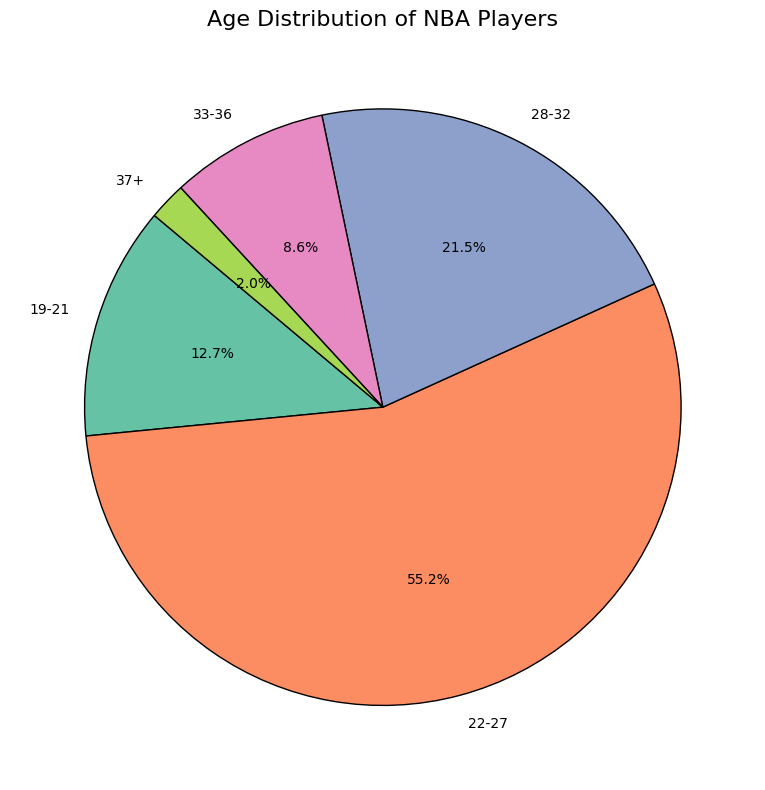

In [51]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')#chatgpt

bins = [18, 21, 27, 32, 36, 99]  # The upper limits of the age groups
labels = ['19-21', '22-27', '28-32', '33-36', '37+']

data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

age_distribution = data['Age Group'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
age_distribution.plot(
    kind='pie',
    autopct='%1.1f%%',  
    startangle=140,     
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'],  
    wedgeprops={'edgecolor': 'black'}
) #ChatGPT to make graph appeasing

plt.title('Age Distribution of NBA Players', fontsize=16)
plt.ylabel('')  

plt.tight_layout()
plt.show()


Majority of the league is in what many consider the peak of their career in that mid 20s area followed by late 20s/early 30s 